In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [2]:
df = (
    pl.scan_csv("/kaggle/input/kepler-exoplanet-search-results/cumulative.csv")
    .drop(["rowid", "kepid", "kepoi_name", "kepler_name"])
    .collect()
)
target_col = "koi_disposition"
target_names = df.get_column(target_col).unique(maintain_order=True)
target_names

koi_disposition
str
"""CONFIRMED"""
"""FALSE POSITIVE"""
"""CANDIDATE"""


In [3]:
df = (
    df
    .cast({cs.string(): pl.Categorical})
    .with_columns(cs.categorical().to_physical())
)
df

koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
u32,u32,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32,u32,f64,f64,f64,f64,i64,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,1.0,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,null,null,93.59,29.45,-16.65,35.8,1,0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
0,0,0.969,0,0,0,0,54.418383,0.0002479,-0.000248,162.51384,0.00352,-0.00352,0.586,0.059,-0.443,4.507,0.116,-0.116,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,null,null,9.11,2.87,-1.62,25.8,2,0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0.0,0,1,0,0,19.89914,0.000015,-0.000015,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.7822,0.0341,-0.0341,10829.0,171.0,-171.0,14.6,3.92,-1.31,638.0,null,null,39.3,31.04,-10.49,76.3,1,0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
1,1,0.0,0,1,0,0,1.736952,2.6300e-7,-2.6300e-7,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.5,-2.83,1395.0,null,null,891.96,668.95,-230.35,505.6,1,0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597
0,0,1.0,0,0,0,0,2.525592,0.000004,-0.000004,171.59555,0.00113,-0.00113,0.701,0.235,-0.478,1.6545,0.042,-0.042,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,null,null,926.16,874.33,-314.24,40.9,1,0,6031.0,169.0,-211.0,4.438,0.07,-0.21,1.046,0.334,-0.133,288.75488,48.2262,15.509
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,1,0.0,0,0,0,1,8.5898708,0.0001846,-0.000185,132.0161,0.0157,-0.0157,0.765,0.023,-0.541,4.806,0.634,-0.634,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,null,null,176.4,152.77,-77.6,8.4,1,0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
1,1,0.0,0,1,1,0,0.527699,1.1600e-7,-1.1600e-7,131.705093,0.00017,-0.00017,1.252,0.051,-0.049,3.2221,0.0174,-0.0174,1579.2,4.6,-4.6,29.35,7.7,-2.57,2088.0,null,null,4500.53,3406.38,-1175.26,453.3,1,0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
2,0,0.497,0,0,0,0,1.739849,0.0000178,-0.000018,133.00127,0.00769,-0.00769,0.043,0.423,-0.043,3.114,0.229,-0.229,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,null,null,1585.81,1537.86,-502.22,10.6,1,0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [4]:
y = df.get_column(target_col)
X = df.drop(target_col)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fold 0


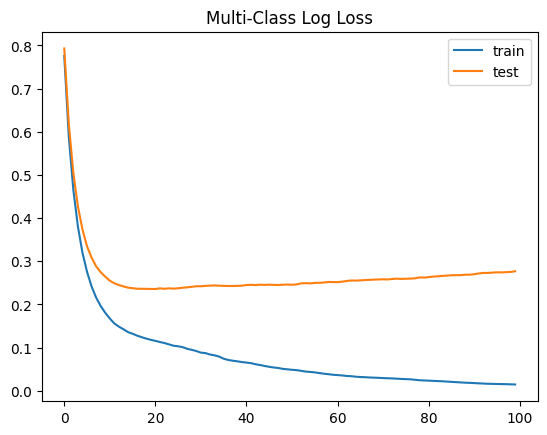

                precision    recall  f1-score   support

     CONFIRMED       0.80      0.79      0.79       230
FALSE POSITIVE       0.99      1.00      0.99       502
     CANDIDATE       0.81      0.80      0.80       225

      accuracy                           0.90       957
     macro avg       0.86      0.86      0.86       957
  weighted avg       0.90      0.90      0.90       957

Fold 1


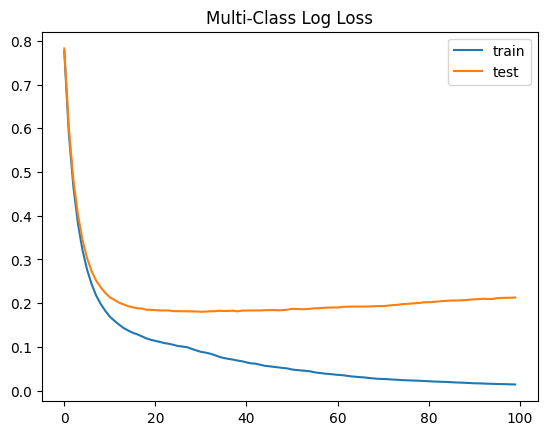

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.87      0.85       230
FALSE POSITIVE       1.00      1.00      1.00       502
     CANDIDATE       0.86      0.82      0.84       225

      accuracy                           0.92       957
     macro avg       0.89      0.89      0.89       957
  weighted avg       0.93      0.92      0.92       957

Fold 2


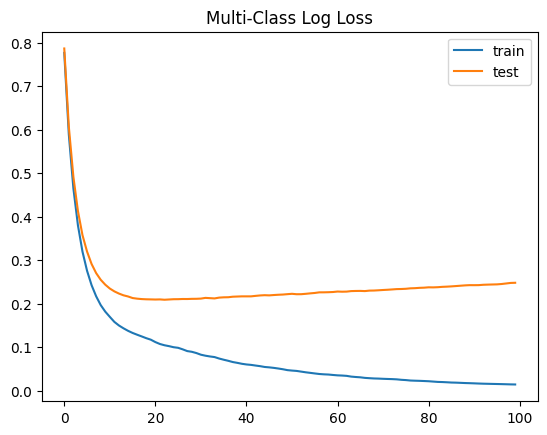

                precision    recall  f1-score   support

     CONFIRMED       0.79      0.82      0.81       230
FALSE POSITIVE       0.99      1.00      1.00       502
     CANDIDATE       0.82      0.78      0.80       225

      accuracy                           0.90       957
     macro avg       0.87      0.87      0.87       957
  weighted avg       0.90      0.90      0.90       957

Fold 3


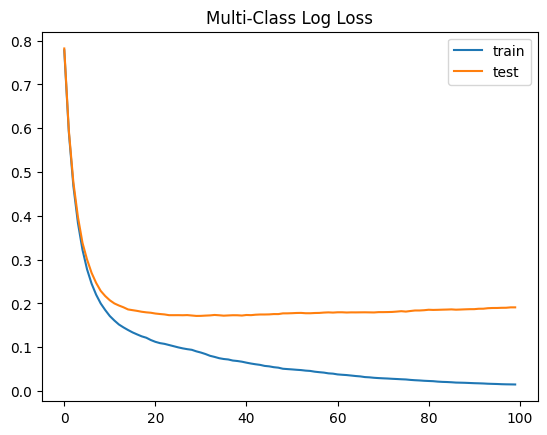

                precision    recall  f1-score   support

     CONFIRMED       0.87      0.84      0.85       229
FALSE POSITIVE       0.99      1.00      0.99       503
     CANDIDATE       0.86      0.87      0.87       225

      accuracy                           0.93       957
     macro avg       0.91      0.90      0.91       957
  weighted avg       0.93      0.93      0.93       957

Fold 4


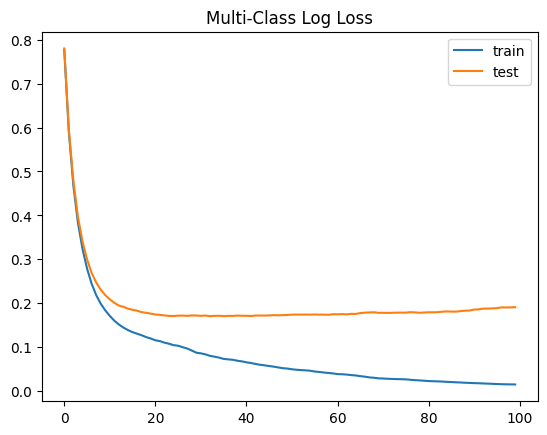

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.84      0.83       229
FALSE POSITIVE       0.99      1.00      1.00       503
     CANDIDATE       0.85      0.83      0.84       224

      accuracy                           0.92       956
     macro avg       0.89      0.89      0.89       956
  weighted avg       0.92      0.92      0.92       956

Fold 5


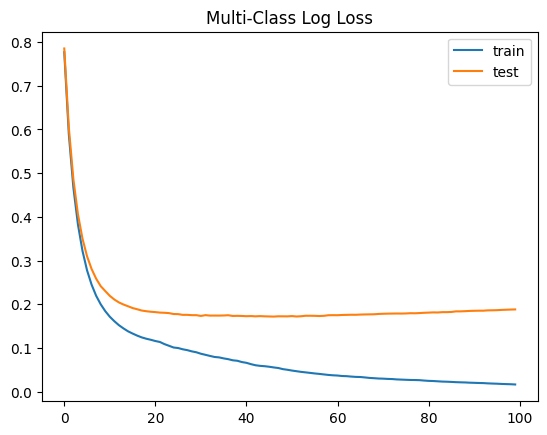

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.87      0.85       229
FALSE POSITIVE       0.99      1.00      1.00       503
     CANDIDATE       0.88      0.82      0.85       224

      accuracy                           0.93       956
     macro avg       0.90      0.90      0.90       956
  weighted avg       0.93      0.93      0.93       956

Fold 6


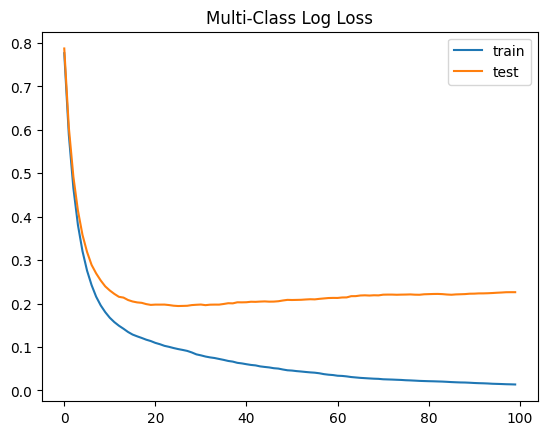

                precision    recall  f1-score   support

     CONFIRMED       0.79      0.86      0.82       229
FALSE POSITIVE       1.00      1.00      1.00       502
     CANDIDATE       0.84      0.77      0.80       225

      accuracy                           0.91       956
     macro avg       0.88      0.87      0.87       956
  weighted avg       0.91      0.91      0.91       956

Fold 7


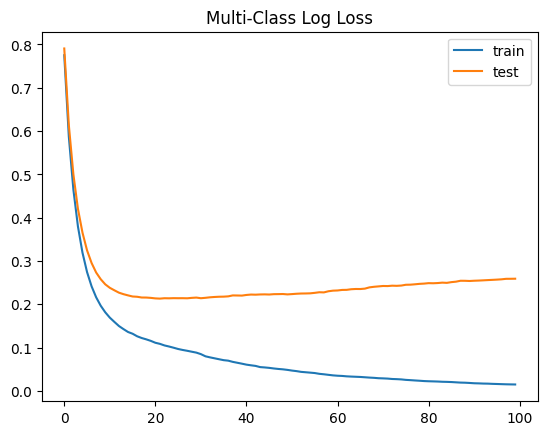

                precision    recall  f1-score   support

     CONFIRMED       0.79      0.83      0.81       229
FALSE POSITIVE       0.99      1.00      1.00       502
     CANDIDATE       0.83      0.77      0.80       225

      accuracy                           0.91       956
     macro avg       0.87      0.87      0.87       956
  weighted avg       0.91      0.91      0.91       956

Fold 8


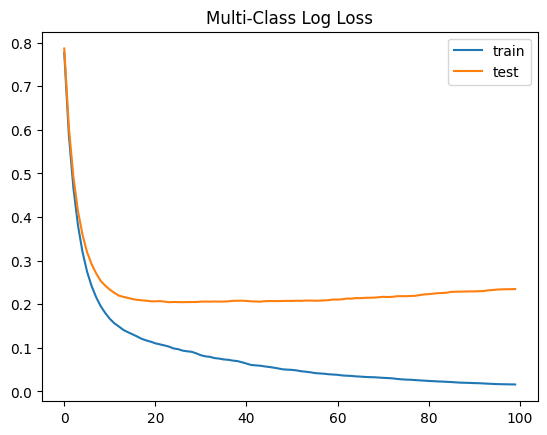

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.85      0.84       229
FALSE POSITIVE       0.99      1.00      1.00       502
     CANDIDATE       0.86      0.83      0.84       225

      accuracy                           0.92       956
     macro avg       0.89      0.89      0.89       956
  weighted avg       0.92      0.92      0.92       956

Fold 9


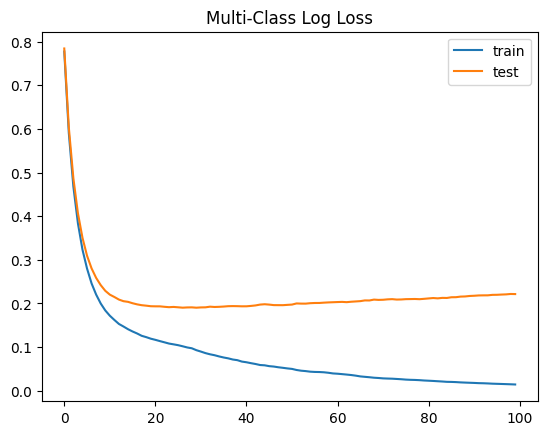

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.86      0.84       229
FALSE POSITIVE       0.99      1.00      1.00       502
     CANDIDATE       0.86      0.82      0.84       225

      accuracy                           0.92       956
     macro avg       0.89      0.89      0.89       956
  weighted avg       0.92      0.92      0.92       956



In [5]:
models = []
losses = []
models_preds = []
clf_reports = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i, (train, test) in enumerate(skf.split(X, y)):
    print("================================================================\nFold", i)
    model = xgb.XGBClassifier(random_state=42)
    model.fit(
        X[train],
        y[train],
        eval_set=[(X[train], y[train]), (X[test], y[test])],
        verbose=False
    )

    models.append((f"Model {i}", model))

    evals_result = model.evals_result()
    losses.append(evals_result)
    plt.plot(evals_result['validation_0']['mlogloss'], label='train')
    plt.plot(evals_result['validation_1']['mlogloss'], label='test')
    plt.title("Multi-Class Log Loss")
    plt.legend()
    plt.show()

    y_preds = model.predict(X[test])
    models_preds.append(y_preds)
    
    clf_report = classification_report(y[test], y_preds, target_names=target_names)
    print(clf_report)
    clf_reports.append(clf_report)

In [6]:
model = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state=42), cv="prefit")
model.fit(X_train, y_train)  # Maybe replace X_train by estimators' preds (sklearn doc not clear)

StackingClassifier(cv='prefit',
                   estimators=[('Model 0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(random_state=42))

In [7]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds, target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00       689
FALSE POSITIVE       1.00      1.00      1.00      1502
     CANDIDATE       1.00      1.00      1.00       679

      accuracy                           1.00      2870
     macro avg       1.00      1.00      1.00      2870
  weighted avg       1.00      1.00      1.00      2870

